<pre>
Download all the data in this folder it contains two file both images and labels.
            
    where the categories are numbered 0 to 15, in the following order:

    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>


 <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>
</pre>

# Split data into train and test

In [ ]:
import pathlib
import pandas as pd
import numpy as np
import os
#importing tensorflow
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.metrics import classification_report

In [ ]:
# count the images in dir( recursive path of dir )
def count_images_in_dir_recursive():
  dir_path = "/21_Transfer_Learning/rvl-cdip/data_final"
  data_root = pathlib.Path(dir_path)
  print(data_root)
  #......
  all_image_paths = list(data_root.glob('*/*/*/*/*/*'))
  image_count = len(all_image_paths)
  print( image_count )

# count_images_in_dir_recursive()

In [ ]:
dir_path = "/21_Transfer_Learning/natural_images"

In [ ]:


data_root = pathlib.Path(dir_path)
print(data_root)

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)


In [ ]:
#list(data_root.iterdir())

In [ ]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print( label_names )

label_to_index = dict((name, index) for index,name in enumerate(label_names))
print( label_to_index )

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
{'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}


In [ ]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

In [ ]:
len( all_image_labels )

6899

In [ ]:
#img_path_colm = np.array( all_image_paths ).reshape(-1,1)
#img_category_colm = np.array( all_image_labels ).reshape(-1,1)

In [ ]:
#
data_dc = {'img_path' : all_image_paths , 'category' : all_image_labels }

In [ ]:
all_img_dataframe = pd.DataFrame( data= data_dc )

In [ ]:
all_img_dataframe.category.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
all_img_dataframe.head(2)

In [ ]:
#all_img_dataframe.to_csv( dir_path + '/natural_images_data/' + 'all_images_data.csv')

In [ ]:
cat_0 = all_img_dataframe.loc[ all_img_dataframe['category'] == 0 ]

cat_1 = all_img_dataframe.loc[ all_img_dataframe['category'] == 1 ]
cat_2 = all_img_dataframe.loc[ all_img_dataframe['category'] == 2 ]
cat_3 = all_img_dataframe.loc[ all_img_dataframe['category'] == 3 ]
cat_4 = all_img_dataframe.loc[ all_img_dataframe['category'] == 4 ]
cat_5 = all_img_dataframe.loc[ all_img_dataframe['category'] == 5 ]
cat_6 = all_img_dataframe.loc[ all_img_dataframe['category'] == 6 ]
cat_7 = all_img_dataframe.loc[ all_img_dataframe['category'] == 7 ]

In [ ]:
cat_0.shape , cat_1.shape , cat_2.shape,cat_3.shape,cat_4.shape,cat_5.shape,cat_6.shape, cat_7.shape

((727, 2),
 (968, 2),
 (885, 2),
 (702, 2),
 (843, 2),
 (1000, 2),
 (788, 2),
 (986, 2))

In [ ]:
cat_0_split = round( (cat_0.shape[0]*0.80) )
cat_1_split = round( (cat_1.shape[0]*0.80) )
cat_2_split = round( (cat_2.shape[0]*0.80) )
cat_3_split = round( (cat_3.shape[0]*0.80) )
cat_4_split = round( (cat_4.shape[0]*0.80) )
cat_5_split = round( (cat_5.shape[0]*0.80) )
cat_6_split = round( (cat_6.shape[0]*0.80) )
cat_7_split = round( (cat_7.shape[0]*0.80) )

In [ ]:
cat_0_train = cat_0.iloc[0 : cat_0_split]
cat_0_test = cat_0.iloc[ cat_0_split  : cat_0.shape[0] ]

cat_1_train = cat_1.iloc[0 : cat_1_split]
cat_1_test = cat_1.iloc[ cat_1_split  : cat_1.shape[0] ]

cat_2_train = cat_2.iloc[0 : cat_2_split]
cat_2_test = cat_2.iloc[ cat_2_split  : cat_2.shape[0] ]

cat_3_train = cat_3.iloc[0 : cat_3_split]
cat_3_test = cat_3.iloc[ cat_3_split  : cat_3.shape[0] ]

cat_4_train = cat_4.iloc[0 : cat_4_split]
cat_4_test = cat_4.iloc[ cat_4_split  : cat_4.shape[0] ]

cat_5_train = cat_5.iloc[0 : cat_5_split]
cat_5_test = cat_5.iloc[ cat_5_split  : cat_5.shape[0] ]

cat_6_train = cat_6.iloc[0 : cat_6_split]
cat_6_test = cat_6.iloc[ cat_6_split  : cat_6.shape[0] ]

cat_7_train = cat_7.iloc[0 : cat_7_split]
cat_7_test = cat_7.iloc[ cat_7_split  : cat_7.shape[0] ]

In [ ]:
cat_1_train.shape , cat_1_test.shape

((774, 2), (194, 2))

In [ ]:
train_img_df = pd.concat([cat_0_train , cat_1_train ,cat_2_train,cat_3_train,cat_4_train,cat_5_train,cat_6_train,cat_7_train])

In [ ]:
train_img_df.tail()

In [ ]:
test_img_df =  pd.concat([cat_0_test , cat_1_test ,cat_2_test,cat_3_test,cat_4_test,cat_5_test,cat_6_test,cat_7_test])

In [ ]:
test_img_df.tail()

In [ ]:
#train_img_df.to_csv( dir_path + '/natural_images_data/' + 'train_images_data.csv' , index=False )
#test_img_df.to_csv( dir_path + '/natural_images_data/' + 'test_images_data.csv' , index=False )
#train_img_df.to_csv( dir_path + '/natural_images_data/' + 'train_images_data.csv'  )
#test_img_df.to_csv( dir_path + '/natural_images_data/' + 'test_images_data.csv'  )

In [ ]:
train_img_df = pd.read_csv( dir_path + '_data/' + 'train_images_data.csv' , index_col= [0])
test_img_df = pd.read_csv( dir_path + '_data/' + 'test_images_data.csv' , index_col= [0])

In [ ]:
train_img_df.head()

,img_path,category
0,/content/drive/My Drive/Colab Notebooks/21_Tra...,0
1,/content/drive/My Drive/Colab Notebooks/21_Tra...,0
2,/content/drive/My Drive/Colab Notebooks/21_Tra...,0
3,/content/drive/My Drive/Colab Notebooks/21_Tra...,0
4,/content/drive/My Drive/Colab Notebooks/21_Tra...,0


In [ ]:
train_img_df.shape , test_img_df.shape

((5519, 2), (1380, 2))

In [ ]:
train_image_paths = list( train_img_df['img_path'].values )
train_image_labels = list( train_img_df['category'].values )

In [ ]:
test_image_paths = list( test_img_df['img_path'].values )
test_image_labels = list( test_img_df['category'].values )

In [ ]:
len( train_image_paths ) ,len( train_image_labels ) ,len( test_image_paths ) ,len( test_image_labels )

(5519, 5519, 1380, 1380)

In [ ]:
###Image data Generator class
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator()
##We are fitting the data to Image data generator.
ImageGenerator = ImageFlow.flow_from_directory(dir_path,target_size=(156,256),seed=10,batch_size=32)

Found 6899 images belonging to 8 classes.


In [ ]:
##Checking time taken to load images. 
import time
start = time.time()
total_batches = 0

batches = 0
per_batch = 32
for x_batch, y_batch in ImageGenerator:
    batches += 1
    if batches >= 6899/per_batch:
        total_batches = total_batches + batches
        break 
end = time.time()
duration = end-start
print("{} batches: {} s".format(total_batches, duration))
print("{:0.5f} Images/s".format(per_batch*total_batches/duration))

In [ ]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [156, 256])
        #one hot coding for label
        y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image, y
    
    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    
    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size
    if (not is_training):
        dataset = dataset.shuffle(1200)


    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    
    #repeat the dataset indefinitely
    dataset = dataset.repeat()

    
    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
def tf_test_generator(images, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [156, 256])
        #one hot coding for label
        #y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image
    
    ##creating a dataset from tensorslices
    #dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = tf.data.Dataset.from_tensor_slices( images )

    #if is_training:
    dataset = dataset.shuffle( len(images) )  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=False))
    
    #repeat the dataset indefinitely
    dataset = dataset.repeat()

    
    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
#creating a generator for train data
tf.keras.backend.clear_session()
tf_train_image_generator = tfdata_generator( train_image_paths , train_image_labels, is_training=True, batch_size=32 )

#tf_train_image_generator = tfdata_generator( train_image_paths , train_image_labels, is_training=True, batch_size=32)
#tf_train_image_generator = tfdata_generator( train_image_paths , train_image_labels, is_training=True, batch_size=256 )

In [ ]:
#creating a generator for train data
tf.keras.backend.clear_session()
tf_validation_image_generator = tfdata_generator( test_image_paths , test_image_labels, is_training=True , batch_size=32 )

In [ ]:
# Model- 1
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer
input_layer = Input(shape=(156,256,3),name='Input_Layer')

vgg16_layer = tf.keras.applications.VGG16(
              include_top=False, weights='imagenet', input_tensor=None, input_shape=(156,256,3),
              pooling=None, classes=8, classifier_activation='softmax'
            )(input_layer)

#Conv Layer
Conv1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg16_layer)
#MaxPool Layer
#Pool1 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)
Pool1 = MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same',data_format='channels_last',name='Pool1')(Conv1)

#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Pool1)
#FC layer
FC1 = Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)

#FC layer
FC2 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)

#output layer
Out = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

#Creating a model
model = Model(inputs=input_layer,outputs=Out)

for layer in model.layers[1:2]:
    layer.trainable = False

#compiling 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 156, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 8, 512)         14714688  
                                                                 
 Conv1 (Conv2D)              (None, 4, 8, 128)         589952    
                                                                 
 Pool1 (MaxPooling2D)        (None, 4, 8, 128)         0         
                                                                 
 Flatten (Flatten)           (None, 4096)              0         
                                                                 
 FC1 (Dense)                 (None, 128)               524416    
                                                                 
 FC2 (Dense)                 (None, 64)                8256  

In [ ]:
tf_train_image_generator

<PrefetchDataset element_spec=(TensorSpec(shape=(32, 156, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 8), dtype=tf.float32, name=None))>

In [ ]:
tf_validation_image_generator

<PrefetchDataset element_spec=(TensorSpec(shape=(32, 156, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 8), dtype=tf.float32, name=None))>

In [ ]:
#tf_train_image_generator
for x, y in tf_train_image_generator:
    print(x.shape , y.shape)
    print(x , y)
    break
    #plt.imshow(x)
    

(32, 156, 256, 3) (32, 8)
tf.Tensor(
[[[[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   ...
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   ...
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   ...
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

  ...

  [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
   [1.0000000e+00 1.0000000e+00 1.00

In [ ]:
#creating a generator for test data
#tf.keras.backend.clear_session()
#tf_test_image_generator = tf_test_generator( test_image_paths , batch_size=32)

In [ ]:
#compiling 
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit_generator(ImageGenerator,steps_per_epoch=216,epochs=3)

In [ ]:
import datetime

In [ ]:
#log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%d-%m-%Y-%H%M%S")
#log_dir

In [ ]:
log_root_path = "/content/21_Transfer_Learning"
log_dir = log_root_path + "/logs/fit/model1/" + datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0, write_graph=True,write_grads=True)
'''
model.fit_generator( tf_train_image_generator ,steps_per_epoch=173 ,epochs=1 ,validation_data= tf_validation_image_generator, 
                    validation_steps=44 ,workers=4,
                    callbacks=[tensorboard_callback])
'''
model.fit( tf_train_image_generator ,steps_per_epoch=173 ,epochs=1 ,validation_data= tf_validation_image_generator, 
                    validation_steps=44 ,workers=4,
                    callbacks=[tensorboard_callback])

173/173 [==============================] - 2948s 17s/step - loss: 0.1624 - accuracy: 0.9409 - val_loss: 0.0748 - val_accuracy: 0.9723


In [ ]:
tf.keras.backend.clear_session()
#tf_validation_image_generator = tfdata_generator( test_image_paths , test_image_labels, is_training=True , batch_size=32 )
tf_test_image_generator_0 = tfdata_generator(test_image_paths, test_image_labels, is_training=True, batch_size=32)

In [ ]:
len(test_image_paths) , tf_test_image_generator_0

(1380,
 <PrefetchDataset element_spec=(TensorSpec(shape=(32, 156, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 8), dtype=tf.float32, name=None))>)

In [ ]:
temp_y_pred = model.predict(tf_test_image_generator_0, steps=44)

In [ ]:
temp_y_pred.shape , temp_y_pred[0:1380].shape

((1408, 8), (1380, 8))

In [ ]:
'''temp_y = []
for x, y in tf_test_image_generator_0:
    #print(x.shape , y.shape)
    #print(x , y)
    #y = model.predict(x)
    temp_y.append( y )
    #break
    #plt.imshow(x)
'''

In [ ]:
y_predicted_0 = [] #model.predict(tf_validation_image_generator)
y_test = []


for x,y in tf_test_image_generator_0:
    #y_test.append(np.argmax( y ))
    
    #y_pred = model.predict(x)
    #print(y)
    #break
    #y_predicted_0.append( y_pred )
    y_test.append( y )


#y_predicted_labels_0 = [np.argmax(i) for i in y_predicted_0]

In [ ]:
y_predicted_labels_0 = [np.argmax(i) for i in temp_y_pred[0:1380]]


In [ ]:
#len(y_test), #y_predicted_0
len(test_image_labels)

1380

Text(69.0, 0.5, 'Truth')

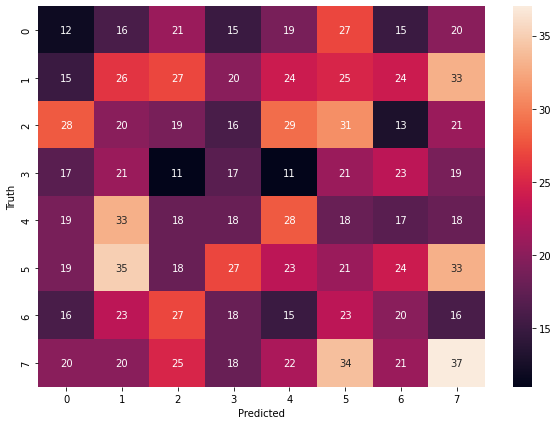

In [ ]:
cm = tf.math.confusion_matrix(labels= test_image_labels , predictions= y_predicted_labels_0 )

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Classification Report: \n", classification_report(test_image_labels, y_predicted_labels_0 ))


Classification Report: 
               precision    recall  f1-score   support

           0       0.08      0.08      0.08       145
           1       0.13      0.13      0.13       194
           2       0.11      0.11      0.11       177
           3       0.11      0.12      0.12       140
           4       0.16      0.17      0.16       169
           5       0.10      0.10      0.10       200
           6       0.13      0.13      0.13       158
           7       0.19      0.19      0.19       197

    accuracy                           0.13      1380
   macro avg       0.13      0.13      0.13      1380
weighted avg       0.13      0.13      0.13      1380



In [ ]:
log_root_path = "/content/21_Transfer_Learning"
log_dir = log_root_path + "/logs/fit/model1/" + datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0, write_graph=True,write_grads=True)

model.fit_generator( tf_train_image_generator ,steps_per_epoch=21,epochs=1 ,validation_data= tf_validation_image_generator, 
                    validation_steps=6 ,workers=4,
                    callbacks=[tensorboard_callback])

 1/21 [>.............................] - ETA: 0s - loss: 0.0722 - accuracy: 0.9688

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer
input_layer2 = Input(shape=(156,256,3),name='Input_Layer')

vgg16_layer2 = tf.keras.applications.VGG16(
              include_top=False, weights='imagenet', input_tensor=None, input_shape=(156,256,3),
              pooling=None, classes=8, classifier_activation='softmax'
            )(input_layer2)

#Conv Layer
Conv21 = Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')( vgg16_layer2 )

Conv22 = Conv2D(filters=8,kernel_size=(1,1),strides=(2,4),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv2')(Conv21)
              
#MaxPool Layer
#Pool21 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv2)
#Pool22 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Pool21)

#Flatten
flatten2 = Flatten(data_format='channels_last',name='Flatten')(Conv22)
#FC layer
#FC21 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten2)

#FC layer
#FC22 = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC21)

#output layer
Out2 = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten2)

#Creating a model
model2 = Model(inputs=input_layer2,outputs=Out2)

for layer in model2.layers[1:2]:
    layer.trainable = False

#compiling 
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 156, 256, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 8, 512)         14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 2, 4, 32)          65568     
_________________________________________________________________
Conv2 (Conv2D)               (None, 1, 1, 8)           264       
_________________________________________________________________
Flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Output (Dense)               (None, 8)                 72        
Total params: 14,780,592
Trainable params: 65,904
Non-trainable params: 14,714,688
_____________________________________

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer
input_layer3 = Input(shape=(156,256,3),name='Input_Layer')
'''
vgg16_layer3 = tf.keras.applications.VGG16(
              include_top=False, weights='imagenet', input_tensor= None, input_shape=(156,256,3),
              pooling=None , classes=8, classifier_activation='softmax'
            )(input_layer3)
'''
vgg16_layer3 = tf.keras.applications.VGG16(
              include_top=False, weights='imagenet', input_tensor= input_layer3, input_shape=(156,256,3),
              pooling=None , classes=8, classifier_activation='softmax'
            )
#Conv Layer
#Conv31 = Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',
#              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg16_layer3 )

Conv31 = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg16_layer3.layers[-1].output )

Conv32 = Conv2D(filters=8,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv2')(Conv31)
              
#MaxPool Layer
#Pool21 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv2)
#Pool22 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Pool21)

#Flatten
flatten3 = Flatten(data_format='channels_last',name='Flatten')(Conv32)
#FC layer
#FC21 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten2)

#FC layer
#FC22 = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC21)

#output layer
Out3 = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten3)

#Creating a model
model3 = Model( inputs=input_layer3 , outputs=Out3 )

for layer in model3.layers[0:13]:
    layer.trainable = False
    #print(layer.trainable)

#compiling 
model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 156, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 64, 128)      

In [ ]:
input_layer3.shape

TensorShape([None, 156, 256, 3])

In [ ]:
for layer in model3.layers:
    #layer.trainable = False
    print(layer.name)

Input_Layer
vgg16
Conv1
Conv2
Flatten
Output


In [ ]:
from keras.applications.vgg16 import VGG16
# load model
# input_layer3 = None   #Input(shape=(156,256,3),name='Input_Layer')

model_vgg16_1 = VGG16(include_top=False, weights='imagenet', input_tensor= None, input_shape=(156,256,3),
              pooling=None , classes=8, classifier_activation='softmax')

#for layer in model_vgg16_1.layers[0:19-6]:
#    layer.trainable = False
#    #print(layer.name)
#print( len(model_vgg16_1.layers[-6:]) )
#print( model_vgg16_1.layers[-1].output )

Conv31 = Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),
              name='Conv1')(  model_vgg16_1.layers[-1].output )

Conv32 = Conv2D(filters=8,kernel_size=(1,1),strides=(2,4),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv2')(Conv31)

# Flatten
flatten3 = Flatten(data_format='channels_last',name='Flatten')(Conv32)
Out3 = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')( flatten3 )                          
           
model_3 = Model(inputs = model_vgg16_1.input , outputs = Out3)

#model3 = Model( inputs=input_layer3 , outputs= flatten3 )
# summarize the model
#model_vgg16_1.summary()

for layer in model_3.layers[0:19-6]:
    layer.trainable = False

model_3.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 156, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 64, 128)     

In [ ]:
for layr in model_vgg16_1.layers[0:5]:
  print(layr.name)
  print(layr.trainable)

input_2
True
block1_conv1
True
block1_conv2
True
block1_pool
True
block2_conv1
True


In [ ]:
vgg16_layer2 = tf.keras.applications.VGG16(
              include_top=False, weights='imagenet', input_tensor=None, input_shape=(156,256,3),
              pooling=None, classes=8, classifier_activation='softmax'
            )

print( "len :--> " , len( vgg16_layer2.layers ))
for layr in vgg16_layer2.layers:
  print(layr.name)
  #print(layr.trainable)

len :-->  19
input_19
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
